In [1]:
from sola.main_classes.domains import HyperParalelipiped
from sola.main_classes.spaces import PCb, RN
from sola.main_classes.mappings import IntegralMapping
from sola.main_classes import functions
from sola.main_classes.SOLA_DLI import Problem
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

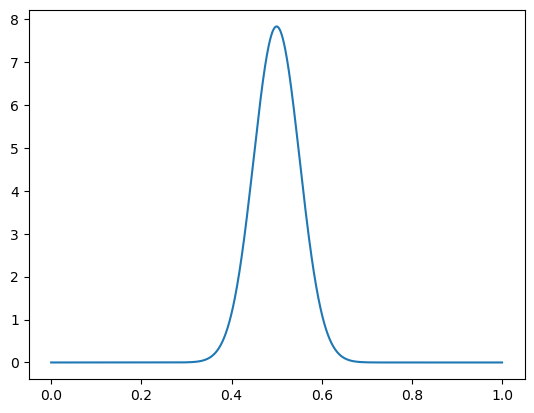

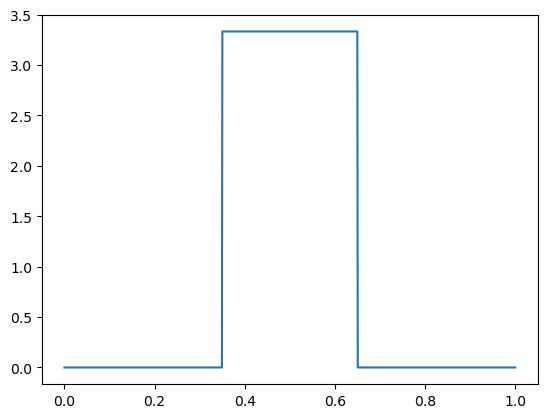

In [2]:
%matplotlib inline
domain = HyperParalelipiped([[0, 1]])
ker = functions.Gaussian_1D(domain=domain, center=0.5, width=0.3)
target = functions.Boxcar_1D(domain=domain, center=0.5, width=0.3)
ker.plot()
target.plot()
plt.show()

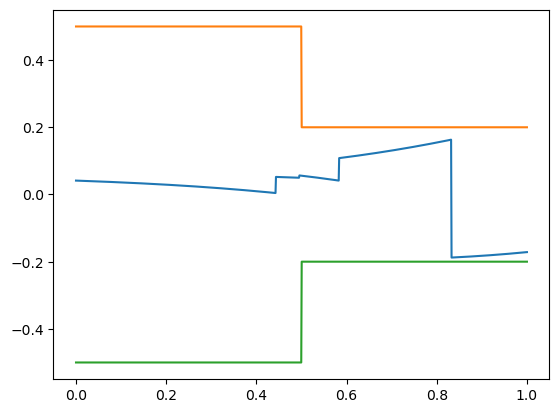

In [3]:
M = PCb(domain=domain)
D = RN(dimension=1)
P = RN(dimension=1)
G = IntegralMapping(domain=M, codomain=D, kernels=[ker])
T = IntegralMapping(domain=M, codomain=P, kernels=[target])
true_model = M.random_member(seed=10)
d_true = G.map(true_model)
bound = functions.Piecewise_1D(domain=domain, intervals=[0, 0.5, 1], values=[0.5, 0.2])
plt.plot(domain.mesh, true_model.evaluate(domain.mesh), label='true model')
plt.plot(domain.mesh, bound.evaluate(domain.mesh), label='bound')
plt.plot(domain.mesh, -bound.evaluate(domain.mesh), label='bound')
plt.show()

In [4]:
my_problem = Problem(M=M, D=D, P=P, G=G, T=T, norm_bound=M.norm(bound), data=d_true)

In [5]:
my_problem.solve()

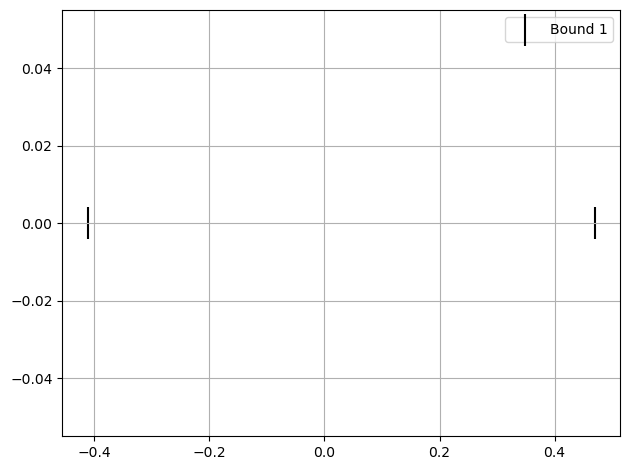

In [6]:
# Your bounds dictionary
bounds = my_problem.solution

# Extracting upper and lower bounds
upper_bound = bounds['upper bound'].flatten()[0]
lower_bound = bounds['lower bound'].flatten()[0]

# Define positions for the bounds and a small offset for the brackets
y_pos = 0
offset = 0.05

# Plotting the bounds
plt.scatter([upper_bound], [y_pos], color='black', marker='|', s=500, label='Bound 1')
plt.scatter([lower_bound], [y_pos], color='black', marker='|', s=500)

# Optional: Add grid, legend, and improve layout
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

/home/adrian/PhD/SOLA_DLI/sola/main_classes/SOLA_DLI.py:464: RuntimeWarning: invalid value encountered in sqrt
  self.npf = np.sqrt(self.norm_bound**2 - self.least_norm**2)
/tmp/ipykernel_12788/1820980791.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma', len(all_bounds))  # Get the magma colormap, with as many colors as bounds


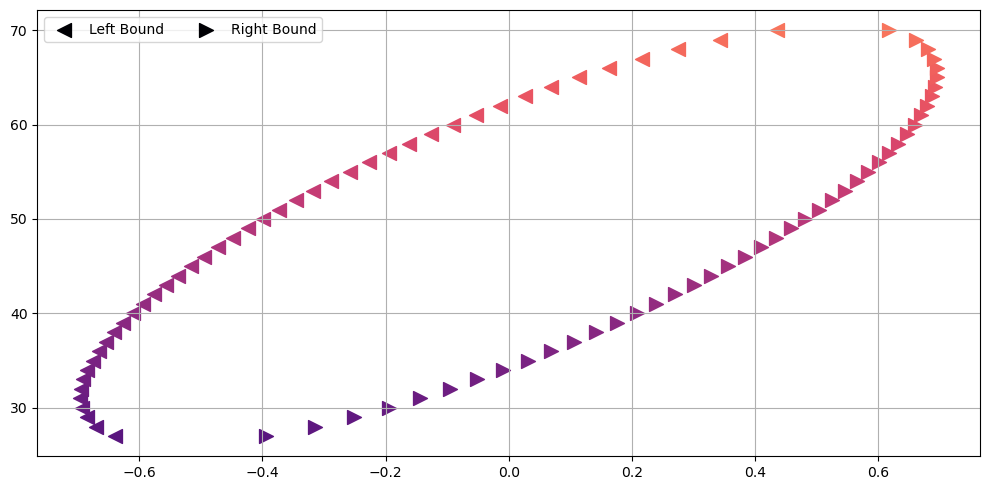

In [7]:
all_data = np.linspace(d_true-2, d_true + 2, 100)

all_bounds = []
for d in all_data:
    my_problem.change_d(new_data=d)
    my_problem.solve()
    bounds = my_problem.solution
    all_bounds.append(bounds)


plt.figure(figsize=(10, 5))
# Get the colormap
cmap = cm.get_cmap('magma', len(all_bounds))  # Get the magma colormap, with as many colors as bounds
max_upper_bound = -np.inf  # Initialize to very small number
min_lower_bound = np.inf  # Initialize to very large number
for index, bounds in enumerate(all_bounds):
    # Extracting upper and lower bounds
    upper_bound = bounds['upper bound'].flatten()[0]
    lower_bound = bounds['lower bound'].flatten()[0]
    # Update max and min bounds
    if upper_bound > max_upper_bound:
        max_upper_bound = upper_bound
    if lower_bound < min_lower_bound:
        min_lower_bound = lower_bound

    # Define positions for the bounds and a small offset for the brackets
    y_pos = index
    offset = 0.05

    # Plotting the bounds using scatter for points with different markers
    color = cmap(index)  # Get color from colormap

    # Use "<" for left bound and ">" for right bound to mimic brackets
    plt.scatter(lower_bound, y_pos, color=color, marker='<', s=100, label='Left Bound' if index == 0 else "")
    plt.scatter(upper_bound, y_pos, color=color, marker='>', s=100, label='Right Bound' if index == 0 else "")

# Optional: Add grid, legend, and improve layout
plt.grid(True)
plt.legend(ncols=2)
plt.tight_layout()

# Show plot
plt.show()

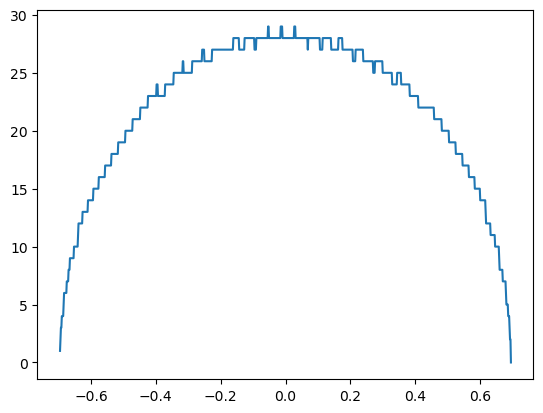

In [8]:
p_domain = HyperParalelipiped([[min_lower_bound, max_upper_bound]])
pwf = functions.Null_1D(domain=p_domain)
for index, bounds in enumerate(all_bounds):
    # Extracting upper and lower bounds
    upper_bound = bounds['upper bound'].flatten()[0]
    lower_bound = bounds['lower bound'].flatten()[0]
    pwf += functions.Piecewise_1D(domain=p_domain,
                                  intervals=[p_domain.bounds[0][0], lower_bound, upper_bound, p_domain.bounds[0][1]],
                                  values=[0, 1, 0])
plt.plot(p_domain.mesh, pwf.evaluate(p_domain.mesh))
plt.show()